In [2]:
# Visualize training history
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
import mlxtend as mlx

import math

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [3]:
def sigmoid(z):
    
    g = 1 / (1 + math.e**-z)
    
    return g

In [4]:
def calculate_accuracy(labels, predictions):
    
    # Calculate the number of correct predictions by comparing 'labels' and 'predictions'
    correct_predictions = np.sum(labels == predictions)
    
    # Calculate the total number of predictions
    total_predictions = len(labels)
    
    # Calculate the accuracy as a percentage
    accuracy_percentage = (correct_predictions / total_predictions) * 100.0
    
    print(f"Accuracy: {accuracy_percentage:.2f}%")

In [5]:
#load the dataset
dataset = np.loadtxt("pima-indians-diabetes.csv", delimiter=",")

#split data set in to X, y variables
features = dataset[:,0:8]
y = dataset[:,8]

#create Scaler object
scaler = StandardScaler()

#scale the features
X = scaler.fit_transform(features)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

#look at the first X row
print(X[0])



X shape: (768, 8)
y shape: (768,)
[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
  0.46849198  1.4259954 ]


In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# split the test at 50:50 for cross validation and the test
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

#print the shapes 
# 460, 154, 154
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_cv shape: {X_cv.shape}")

# 460, 154 154
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_cv shape: {y_cv.shape}")

X_train shape: (460, 8)
X_test shape: (154, 8)
X_cv shape: (154, 8)
y_train shape: (460,)
y_test shape: (154,)
y_cv shape: (154,)


In [7]:
# create the actual model 
model = Sequential([
    tf.keras.Input(shape=(8,)),
    Dense(12, activation="softmax", kernel_regularizer=l2(0.0)),
    Dense(8, activation="softmax", kernel_regularizer=l2(0.0)),
    Dense(1, activation='linear')
])

print(model.summary())

# compile the model
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ["accuracy"]
)

# fit the model
history = model.fit(
    X_train, y_train,
    validation_data = (X_cv, y_cv),
    epochs = 100
)

# history data
print(history.history.keys())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/100
15/15 [==============================] - 0s 6ms/step - loss: 0.6603 - accuracy: 0.6391 - val_loss: 0.6520 - val_accuracy: 0.6623
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6592 - accuracy: 0.6391 - val_loss: 0.6502 - val_accuracy: 0.6623
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6580 - accuracy: 0.6391 - val_loss: 0.6489 - val_accuracy: 0.6623
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6570 - accuracy: 0.6391 - val_loss: 0.6476 - val_accuracy: 0.6623
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6562 - accuracy: 0.6391 - val_loss: 0.6464 - val_accuracy: 0.6623
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6552 - accuracy: 0.6391 - val_loss: 0.6455 - val_accuracy: 0.6623
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.6391 - val_loss: 0.6444 - val_accuracy: 0.6623
Epoch 8/

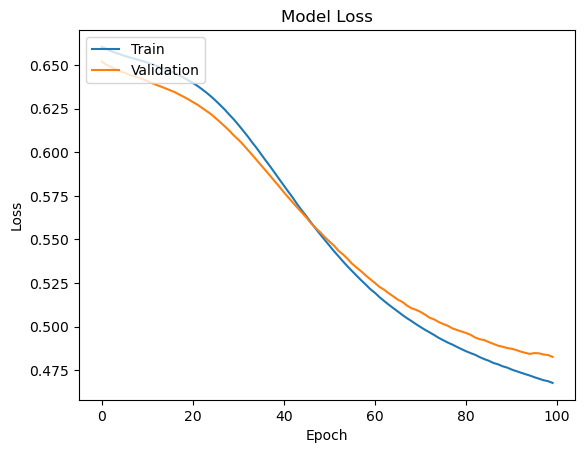

In [8]:
# summary for loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

In [9]:
# function to make predicitons
def get_predictions(feature_data):
    
    # run the feature data through the trained model
    
    logits = model(feature_data)
    
    # apply sigmoid (0 - > 1)
    logits = sigmoid(logits)
    
    # get the prediction probs
    predictions = logits >= 0.5
    
    # sneaky trick to make everything an integer, 0 or 1 from the line above
    predictions = [int(boolean) for boolean in predictions]
    
    return predictions

In [10]:
prediciton_train = get_predictions(X_train)
print(prediciton_train)


# module to create & disply confusion matrix

def print_confusion_matrix(true_labels, predictions): 
    # plot the confusion matrix
    
    mat = confusion_matrix(true_labels, predictions)
    plot_confusion_matrix(conf_mat = mat)
    
    # calculate precision, recall, f1 scores, and display them
    
    # precision
    precision = precision_score(true_labels, predictions)
    
    # recall
    recall = recall_score(true_labels, predictions)
    
    # f1 score
    f1 = f1_score(true_labels, predictions)
    
    # display precision, recall, and f1
    print(f"Precision = {precision:.4f}, \n Recall = {recall:.4f}, \n F1 = {f1:.4f}")


[0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 

In [11]:
# calculate training accuracy

calculate_accuracy(y_train, prediciton_train)

Accuracy: 77.61%


Precision = 0.6981, 
 Recall = 0.6687, 
 F1 = 0.6831


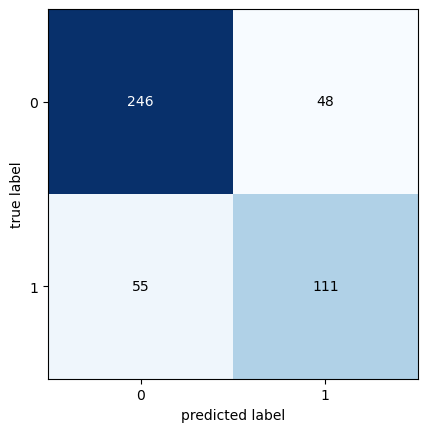

In [12]:
print_confusion_matrix(y_train, prediciton_train)

Precision = 0.6667, 
 Recall = 0.7308, 
 F1 = 0.6972


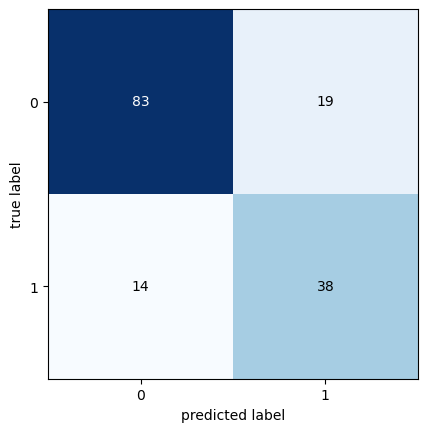

In [13]:
print_confusion_matrix(y_cv, get_predictions(X_cv))

In [15]:
# evaulate the model on the test set
print("Evaluate on the Test Data Set")
results = model.evaluate(X_test, y_test, )
print(f"Test loss, Test accuracy: {results}")


Evaluate on the Test Data Set
5/5 [==============================] - 0s 813us/step - loss: 0.4766 - accuracy: 0.7727
Test loss, Test accuracy: [0.4765841066837311, 0.7727272510528564]


Accuracy: 77.92%
Precision = 0.6379, 
 Recall = 0.7400, 
 F1 = 0.6852


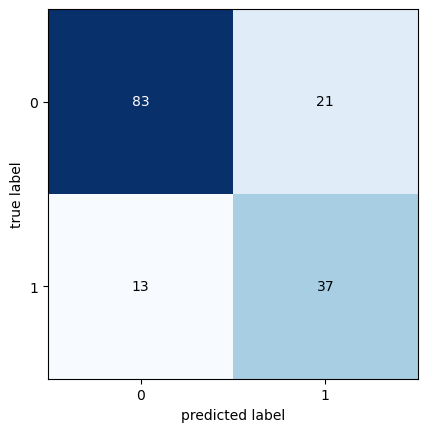

In [16]:
# determine the prediciton accuracy
predictions = get_predictions(X_test)
calculate_accuracy(y_test, predictions)
print_confusion_matrix(y_test, predictions)

In [17]:
# our model and cross validation are relatively close, meaning that the model is not overfitting the data

In [18]:
# save the model
model.save("nn_model.keras")

In [ ]:
# for learning purposes

# new_model = tf.keras.models.load_model("nn_model.keras")
